In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("DataScience_salaries_2024.csv")

In [3]:
df0 = df.copy()

In [4]:
df=df0

In [5]:
df.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
11749,2022,SE,FT,Data Engineer,95000,USD,95000,US,0,US,M
5432,2023,SE,FT,Analytics Engineer,165000,USD,165000,US,0,US,M
14009,2021,EN,FT,Data Analyst,56000,AUD,42028,AU,50,AU,L
11156,2023,EN,FT,Data Scientist,101400,BRL,19910,BR,100,BR,L
9987,2022,SE,FT,Data Analyst,115934,USD,115934,US,0,US,M
3019,2023,MI,FT,Machine Learning Engineer,200000,USD,200000,US,0,US,M
13832,2023,EN,FT,Data Engineer,60000,USD,60000,US,100,US,M
756,2024,SE,FT,Machine Learning Engineer,270400,USD,270400,US,0,US,M
8265,2023,MI,FT,Data Scientist,135000,USD,135000,US,0,US,M
12729,2023,SE,FT,Data Analyst,80000,USD,80000,PL,100,PL,M


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

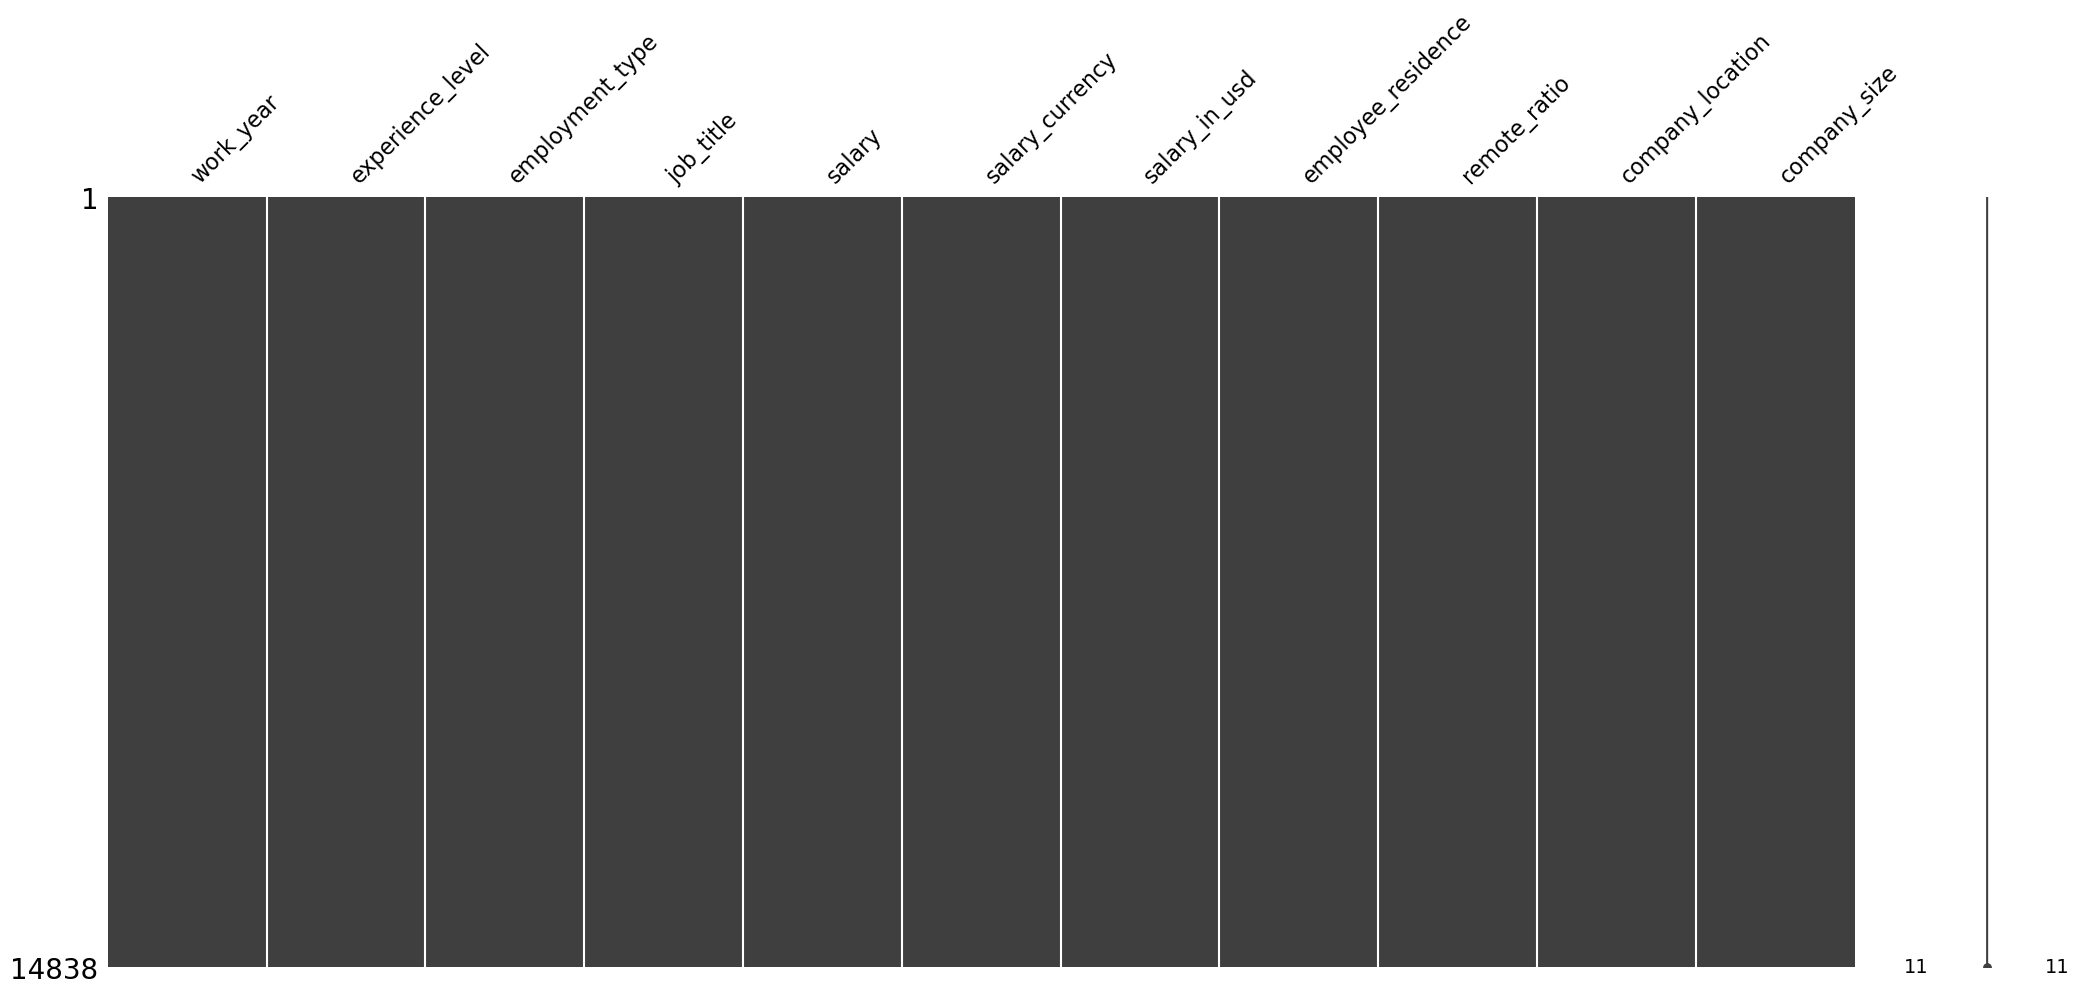

In [8]:
msno.matrix(df);

In [9]:
df.duplicated().sum()

5711

In [10]:
df['job_title'].value_counts().head(25)

job_title
Data Engineer                      3162
Data Scientist                     3015
Data Analyst                       2189
Machine Learning Engineer          1542
Research Scientist                  475
Analytics Engineer                  403
Applied Scientist                   383
Data Architect                      369
Research Engineer                   276
Business Intelligence Engineer      230
Data Science                        205
Data Manager                        188
ML Engineer                         163
Business Intelligence Analyst       147
Machine Learning Scientist          124
Data Science Manager                114
Research Analyst                    107
AI Engineer                         105
BI Developer                         84
Data Science Consultant              79
Data Specialist                      78
Data Analytics Manager               56
Business Intelligence                50
Business Intelligence Developer      49
Head of Data                  

In [11]:
# To show how many duplicates there are
duplicate_counts = df.duplicated().sum()
unique_counts = len(df) - duplicate_counts

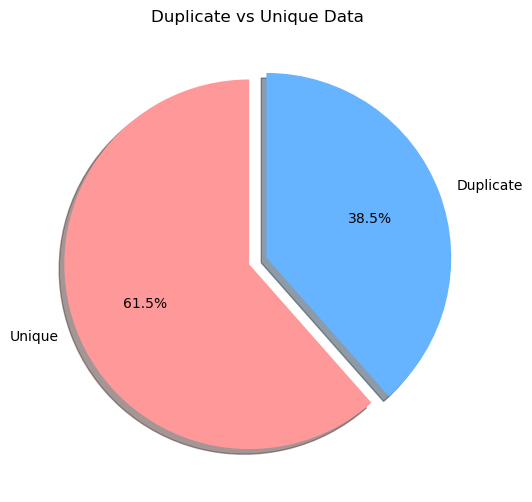

In [12]:
# Let's show duplicate and unique data with Pie chart
import matplotlib.pyplot as plt

labels = ['Unique', 'Duplicate']
sizes = [unique_counts, duplicate_counts]
colors = ['#ff9999','#66b3ff']
explode = (0.05, 0.05)

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Duplicate vs Unique Data')
plt.show()

In [13]:
print(f" Original data set size: {df.shape}")

 Original data set size: (14838, 11)


In [14]:
# Remove duplicate data (preserving the first seen)
df = df.drop_duplicates()
print(f"Cleaned data set size: {df.shape}")

Cleaned data set size: (9127, 11)


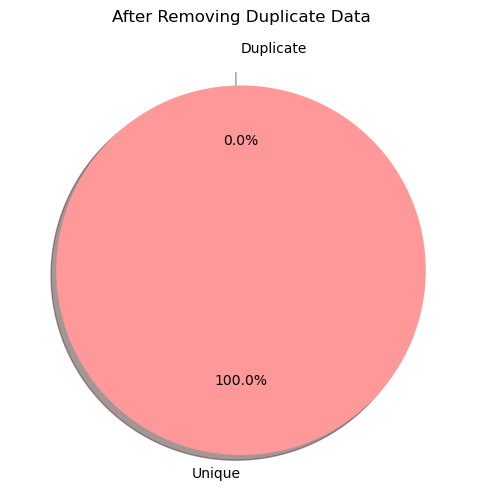

In [15]:
# Same graph after cleaning duplicate data
duplicate_counts = df.duplicated().sum()
unique_counts = len(df) - duplicate_counts

sizes_cleaned = [unique_counts, duplicate_counts]

plt.figure(figsize=(6,6))
plt.pie(sizes_cleaned, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('After Removing Duplicate Data')
plt.show()

In [16]:
# Let's check for negative values in numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
negative_values = df[numeric_columns] < 0
negative_counts = negative_values.sum()

print("Number of negative values in numeric columns:\n", negative_counts)

Number of negative values in numeric columns:
 work_year        0
salary           0
salary_in_usd    0
remote_ratio     0
dtype: int64


In [17]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,9127.000000,9.127000e+03,9127.000000,9127.000000
mean,2023.144735,1.715814e+05,146752.407363,36.309850
std,0.779968,4.514935e+05,73414.901761,47.386109
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,9.545150e+04,95000.000000,0.000000
50%,2023.000000,1.400000e+05,138400.000000,0.000000
75%,2024.000000,1.885000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [18]:
# Turn off scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [19]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,9127.00,9127.00,9127.00,9127.00
mean,2023.14,171581.43,146752.41,36.31
std,0.78,451493.53,73414.90,47.39
min,2020.00,14000.00,15000.00,0.00
25%,2023.00,95451.50,95000.00,0.00
50%,2023.00,140000.00,138400.00,0.00
75%,2024.00,188500.00,185900.00,100.00
max,2024.00,30400000.00,800000.00,100.00


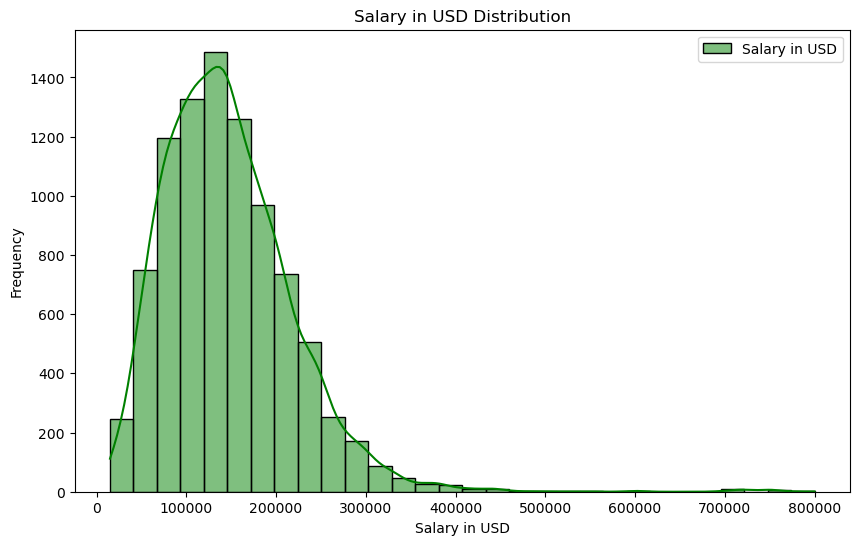

In [20]:
# Salary in USD distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True, bins=30, color='green', label='Salary in USD')
plt.title('Salary in USD Distribution')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.legend()
plt.show()

 Right-skewed distributions occur when a large number of people receive lower salaries, but a small number receive excessively high salaries.

In [22]:
# Let's get the mode, median and mean values for the salary_in_usd column
salary_mode = df['salary_in_usd'].mode()[0]
salary_median = df['salary_in_usd'].median()
salary_mean = df['salary_in_usd'].mean()

print(f"Mode: {salary_mode}, Median: {salary_median}, Average: {salary_mean}")

Mode: 150000, Median: 138400.0, Average: 146752.4073627698


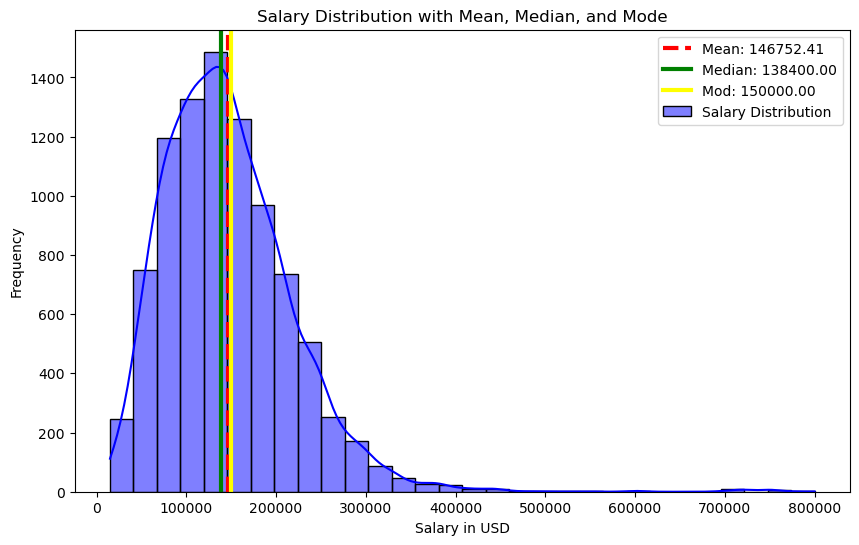

In [23]:
# Chart to show salary distribution and statistical values
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True, bins=30, color='blue', label='Salary Distribution')

# Let's show the Mean, Median and Mode
plt.axvline(salary_mean, color='red', linestyle='--',lw=3, label=f'Mean: {salary_mean:.2f}')
plt.axvline(salary_median, color='green', linestyle='-',lw=3, label=f'Median: {salary_median:.2f}')
plt.axvline(salary_mode, color='yellow', linestyle='-', lw=3, label=f'Mod: {salary_mode:.2f}')

plt.title('Salary Distribution with Mean, Median, and Mode')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.legend()
plt.show()

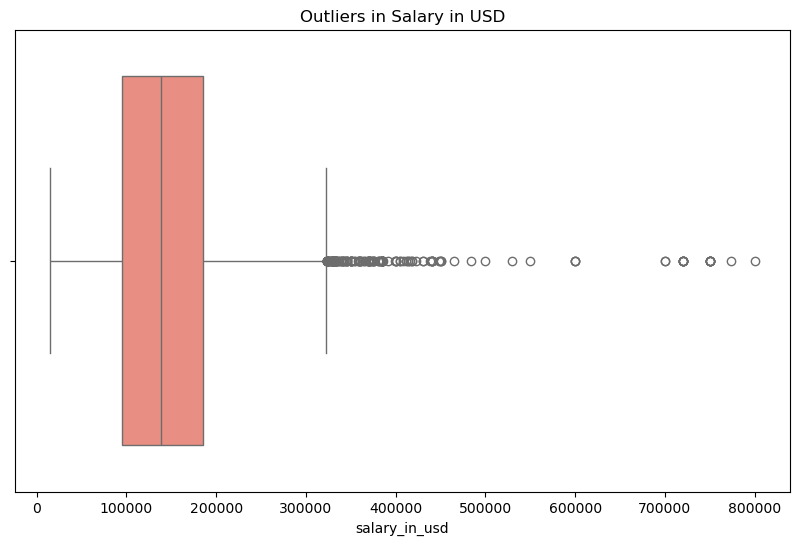

In [24]:
# We use boxplot to detect outliers in the Salary_in_usd column
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='salary_in_usd', color='#FA8072')
plt.title('Outliers in Salary in USD')
plt.show()

In [25]:
# Detecting outliers in the Salary_in_usd column
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

In [26]:
# Identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

-41350.0
322250.0


In [28]:
# Display outliers
outliers = df[(df['salary_in_usd'] < lower_bound) | (df['salary_in_usd'] > upper_bound)]
print("Outliers:")
outliers.head()

Outliers:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
46,2023,SE,FT,AI Scientist,1500000,ILS,417937,IL,0,IL,L
66,2024,MI,FT,AI Architect,800000,USD,800000,CA,100,CA,M
68,2024,EN,FT,Data Analyst,774000,USD,774000,MX,0,MX,M
69,2024,SE,FT,Analytics Engineer,750000,USD,750000,US,0,US,M
70,2024,MI,FT,Machine Learning Scientist,750000,USD,750000,US,0,US,M


In [29]:
# Detect outliers in the salary column
print(f"Number of outliers detected: {len(outliers)}")

Number of outliers detected: 166


In [30]:
df = df[df['salary_in_usd'] < df['salary_in_usd'].quantile(0.99)]

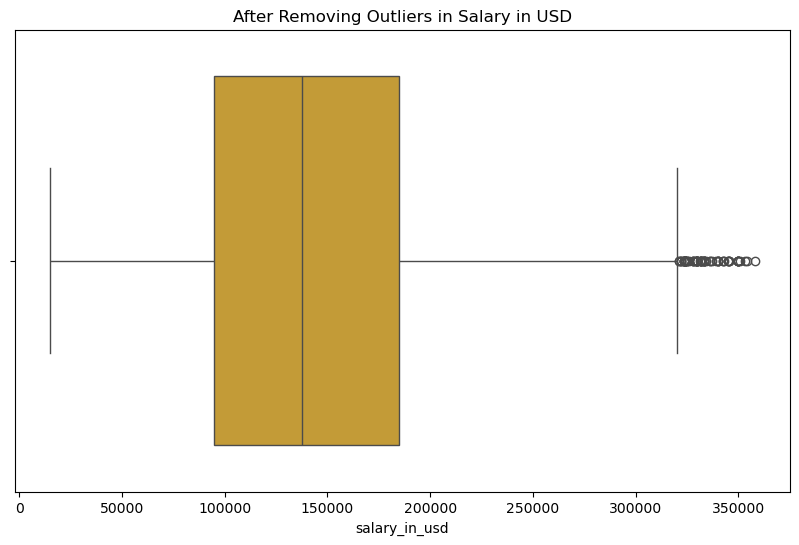

In [31]:
# After the outliers are removed, let's show them with boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='salary_in_usd', color = '#DAA520')
plt.title('After Removing Outliers in Salary in USD')
plt.show()

In [32]:
df['job_title'].value_counts().head(10)

job_title
Data Engineer                1703
Data Scientist               1676
Data Analyst                 1240
Machine Learning Engineer     858
Analytics Engineer            326
Research Scientist            275
Data Architect                239
Research Engineer             186
Data Science                  161
ML Engineer                   140
Name: count, dtype: int64

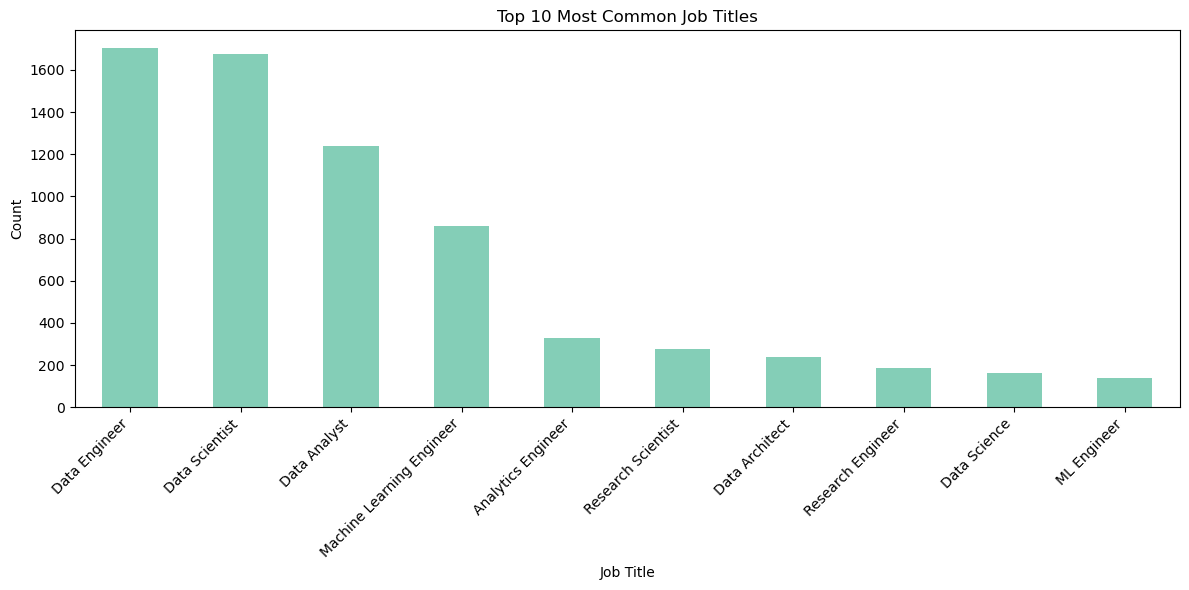

In [33]:
# 1: Most common job titles & Most in-demand job titles
plt.figure(figsize=(12, 6))
df['job_title'].value_counts().head(10).plot(kind='bar', colormap='Set2', alpha=0.8)
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

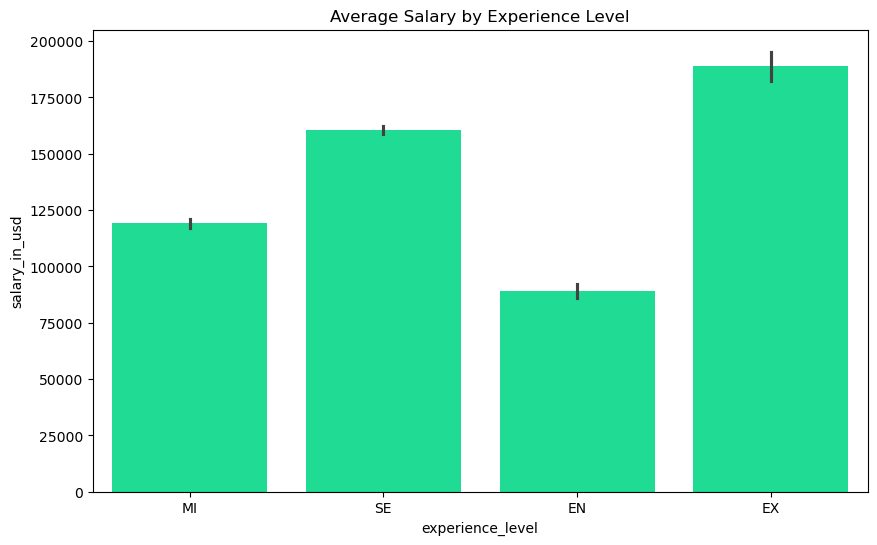

In [34]:
# 2. Salary Analysis by Experience Level
plt.figure(figsize=(10, 6))
sns.barplot(x='experience_level', y='salary_in_usd', data=df, color = '#00FA9A')
plt.title('Average Salary by Experience Level')
plt.show()

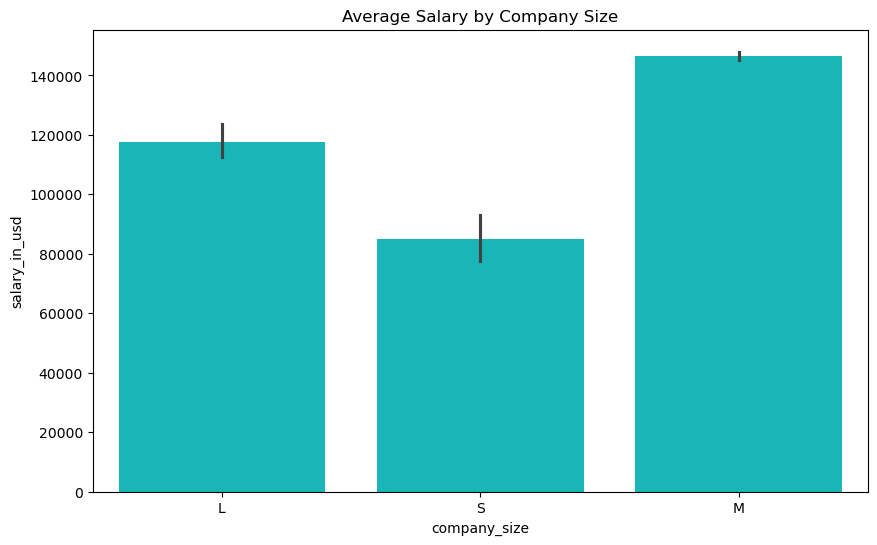

In [35]:
# 3. Salary Analysis by Company Size
plt.figure(figsize=(10, 6))
sns.barplot(x='company_size', y='salary_in_usd', data=df, color = '#00CED1')
plt.title('Average Salary by Company Size')
plt.show()

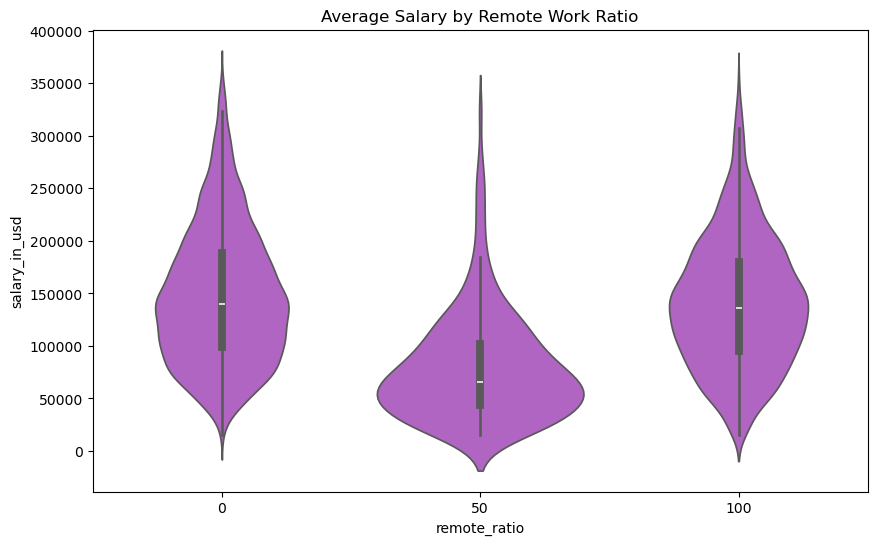

In [36]:
# 4. Salary Analysis by Remote Work Rate
plt.figure(figsize=(10, 6))
sns.violinplot(x='remote_ratio', y='salary_in_usd', data=df, color= '#BA55D3')
plt.title('Average Salary by Remote Work Ratio')
plt.show()

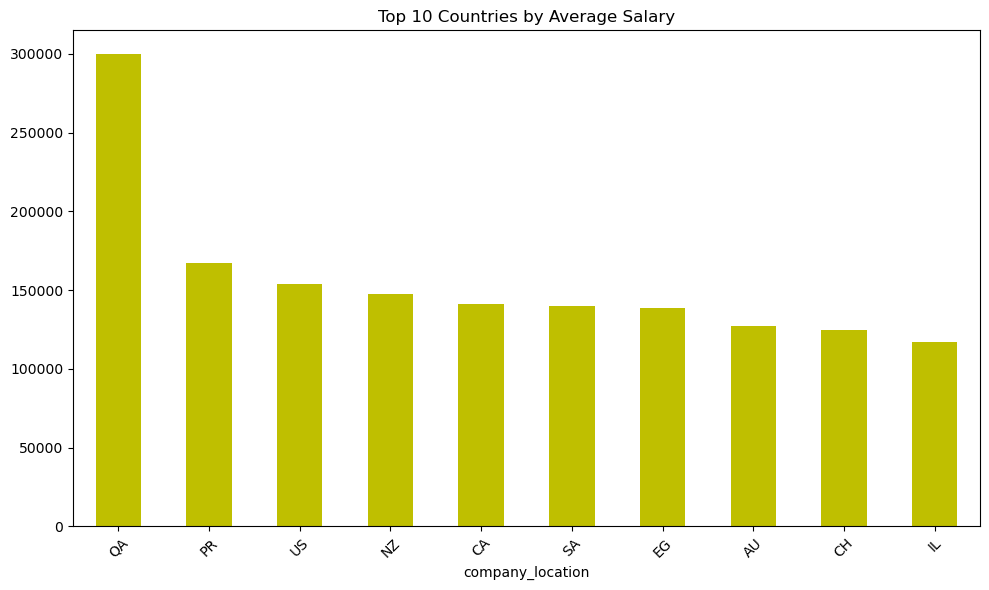

In [37]:
# 5. Average Salary by Country
top_10_countries = df.groupby('company_location')['salary_in_usd'].mean().nlargest(10)
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='y')
plt.title('Top 10 Countries by Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

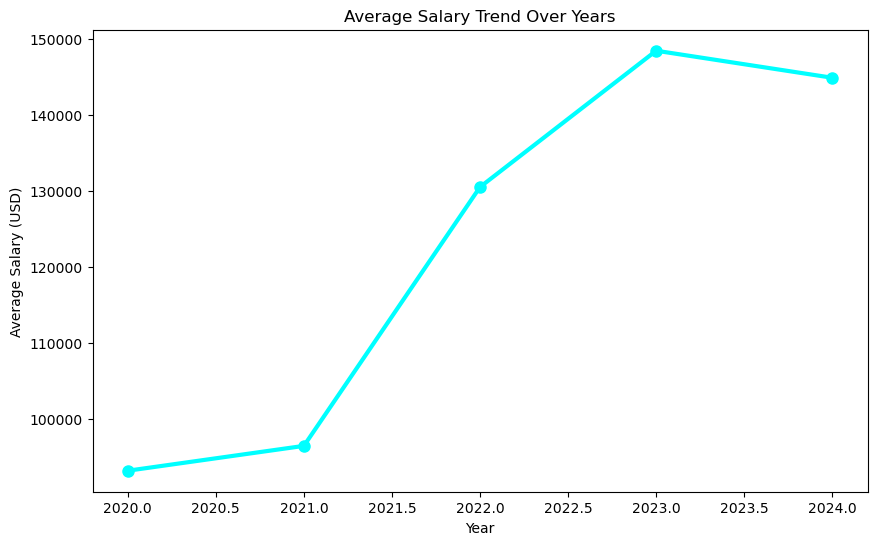

In [38]:
# 6. Salary Trend by Year
yearly_salary = df.groupby('work_year')['salary_in_usd'].mean()
plt.figure(figsize=(10, 6))
yearly_salary.plot(kind='line', marker='o', lw=3, ms=8, color='#00FFFF')
plt.title('Average Salary Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.show()

In [39]:
# Categorizing ways of working
df['remote_category'] = df['remote_ratio'].map({0: 'On-site', 50: 'Hybrid', 100: 'Full Remote'})

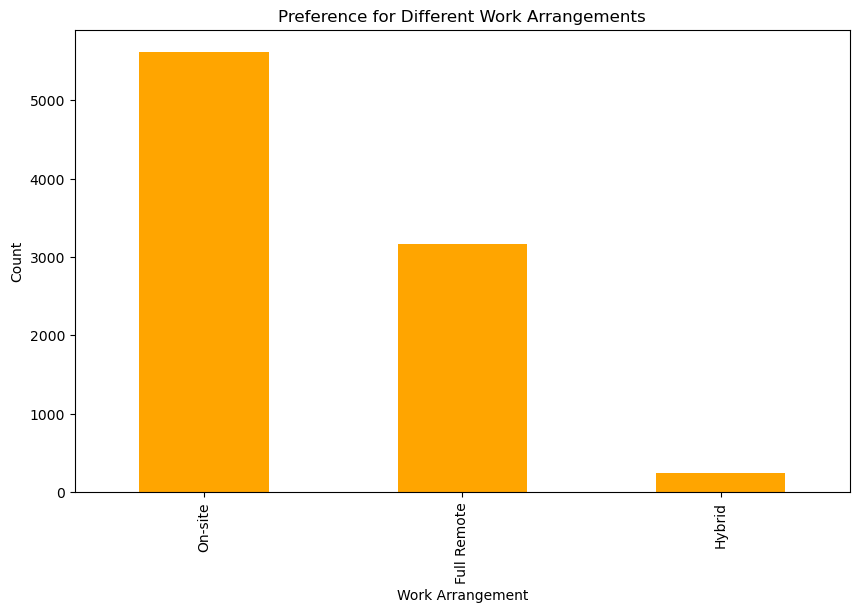

In [40]:
# 7.Ratios of ways of working
work_arrangement_counts = df['remote_category'].value_counts()
plt.figure(figsize=(10, 6))
work_arrangement_counts.plot(kind='bar', color='#FFA500')
plt.title('Preference for Different Work Arrangements')
plt.xlabel('Work Arrangement')
plt.ylabel('Count')
plt.show()

In [41]:
df['job_title'].value_counts().head(10)

job_title
Data Engineer                1703
Data Scientist               1676
Data Analyst                 1240
Machine Learning Engineer     858
Analytics Engineer            326
Research Scientist            275
Data Architect                239
Research Engineer             186
Data Science                  161
ML Engineer                   140
Name: count, dtype: int64

In [42]:
top_10_titles = df['job_title'].value_counts().head(10).index

# Filter data: Select only the first 10 job titles
filtered_df = df[df['job_title'].isin(top_10_titles)]

# Grouping according to ways of working
grouped_df = filtered_df.groupby(['job_title', 'remote_category']).size().unstack(fill_value=0)

In [ ]:
# 8.Working patterns according to job_title
plt.figure(figsize=(12, 8))
grouped_df.plot(kind='bar', stacked=True, width=0.8)
plt.title('Top-10 of Job_Title By Remote_Category', fontsize=16 , pad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Remote_Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout();

<Figure size 1000x600 with 0 Axes>

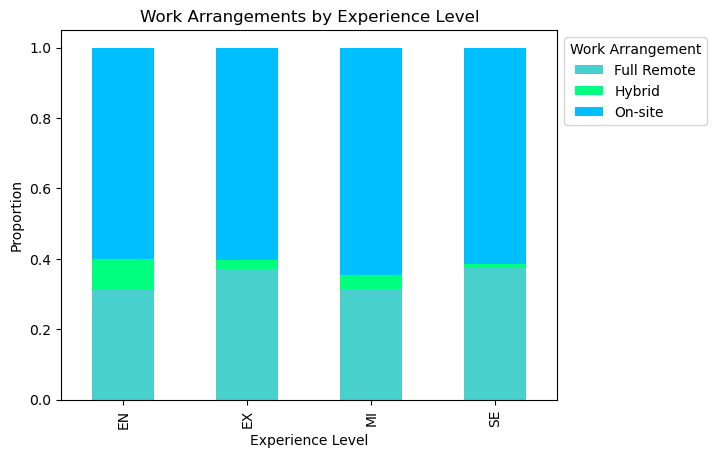

In [48]:
# 9.Ways of working according to experience levels
experience_remote = pd.crosstab(df['experience_level'], df['remote_category'], normalize='index')
plt.figure(figsize=(10, 6))
experience_remote.plot(kind='bar', stacked=True, color = ['#48D1CC', '#00FF7F', '#00BFFF'])
plt.title('Work Arrangements by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Proportion')
plt.legend(title='Work Arrangement', bbox_to_anchor=(1, 1))
plt.show()

<Figure size 1000x600 with 0 Axes>

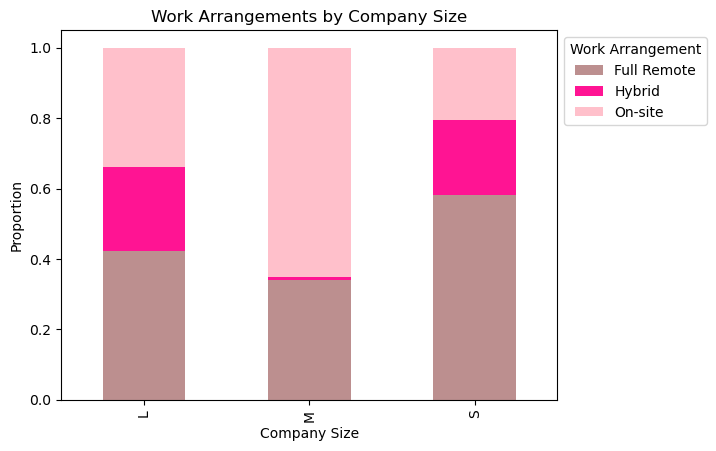

In [49]:
# 10.Ways of working according to company size
company_size_remote = pd.crosstab(df['company_size'], df['remote_category'], normalize='index')
plt.figure(figsize=(10, 6))
company_size_remote.plot(kind='bar', stacked=True, color = ['#BC8F8F', '#FF1493', '#FFC0CB'])
plt.title('Work Arrangements by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Proportion')
plt.legend(title='Work Arrangement' , bbox_to_anchor=(1, 1))
plt.show()

<Figure size 1200x600 with 0 Axes>

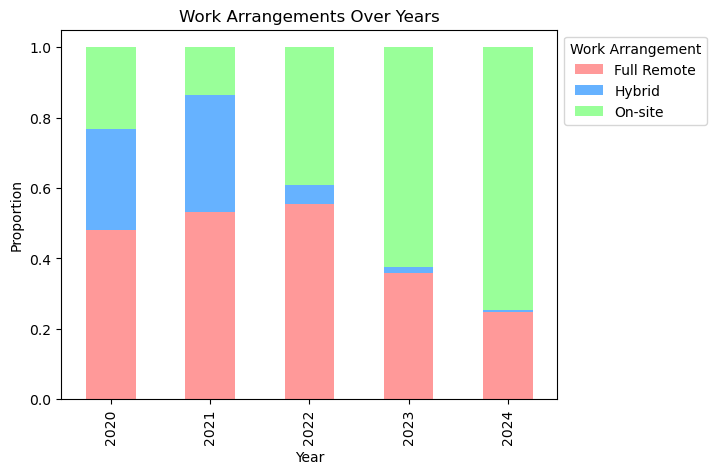

In [50]:
# 11. Changes in working patterns over the years
work_arrangement_by_year = pd.crosstab(df['work_year'], df['remote_category'], normalize='index')
plt.figure(figsize=(12, 6))
work_arrangement_by_year.plot(kind='bar', stacked=True, color = ['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Work Arrangements Over Years')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='Work Arrangement', bbox_to_anchor=(1, 1))
plt.show()

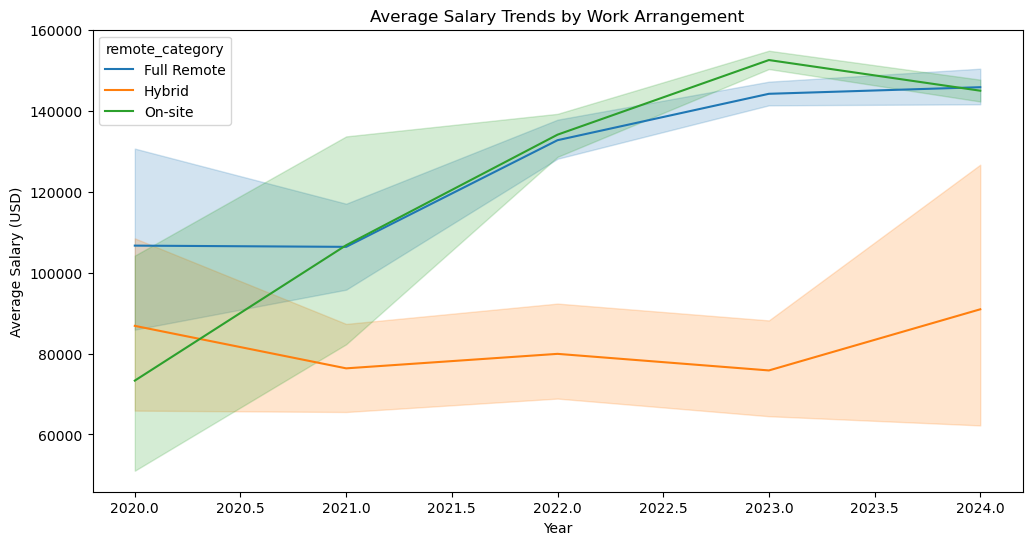

In [51]:
# 12. Changes in average salaries over the years (by type of work)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='remote_category')
plt.title('Average Salary Trends by Work Arrangement')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.show()

<Figure size 1200x600 with 0 Axes>

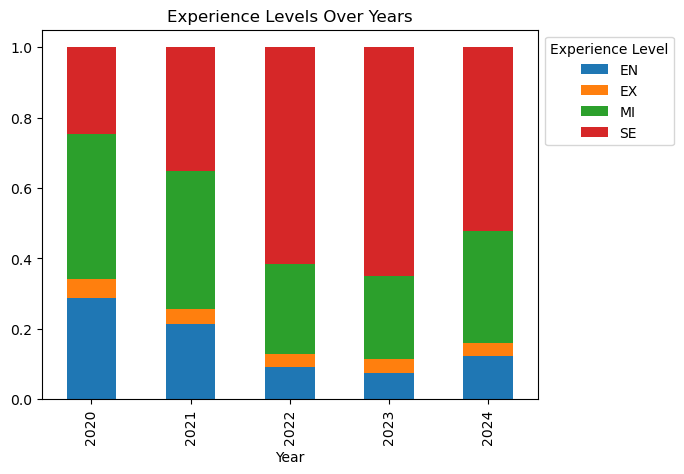

In [52]:
# 13. Change in experience levels by years
experience_by_year = pd.crosstab(df['work_year'], df['experience_level'], normalize='index')
plt.figure(figsize=(12, 6))
experience_by_year.plot(kind='bar', stacked=True)
plt.title('Experience Levels Over Years')
plt.xlabel('Year')
plt.legend(title='Experience Level',bbox_to_anchor = (1,1))
plt.show()

<Figure size 1200x600 with 0 Axes>

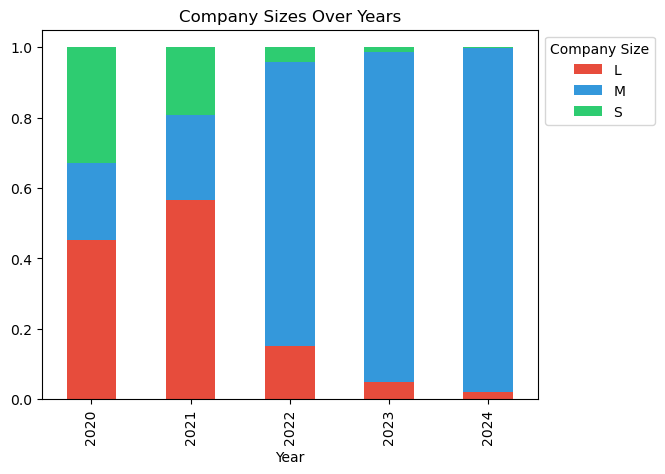

In [53]:
# 14. Change in company size by years
company_size_by_year = pd.crosstab(df['work_year'], df['company_size'], normalize='index')
plt.figure(figsize=(12, 6))
company_size_by_year.plot(kind='bar', stacked=True, color=['#E74C3C', '#3498DB', '#2ECC71'])
plt.title('Company Sizes Over Years')
plt.xlabel('Year')
plt.legend(title='Company Size', bbox_to_anchor=(1,1))
plt.show()

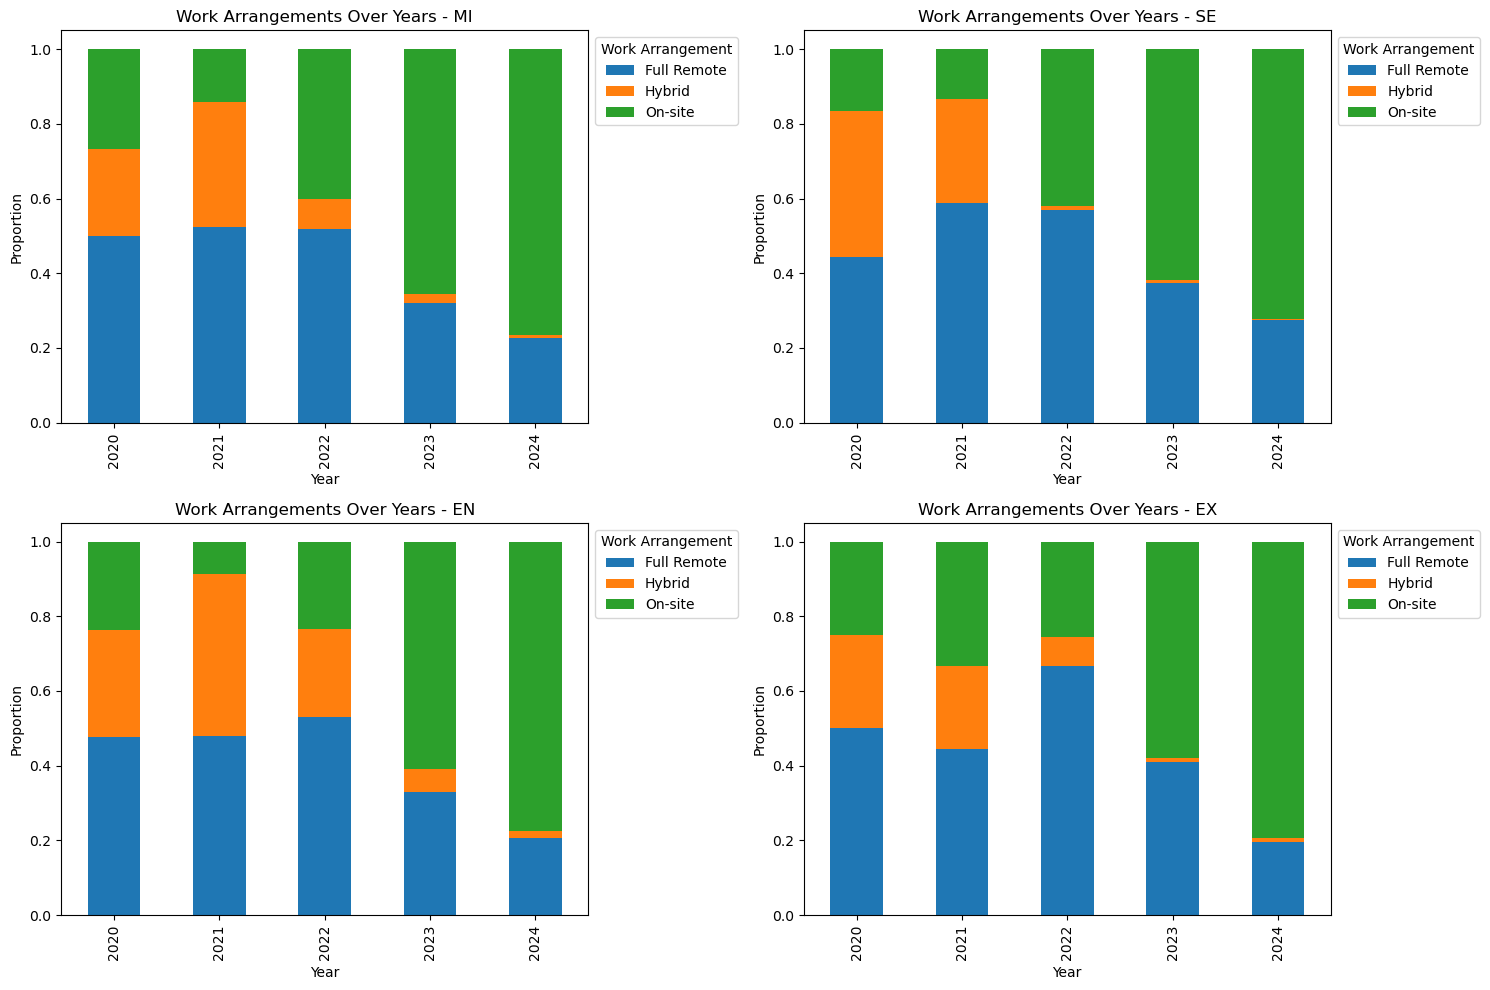

In [54]:
# 15. Change in working patterns according to years and experience levels
plt.figure(figsize=(15, 10))
for i, exp_level in enumerate(df['experience_level'].unique()):
    plt.subplot(2, 2, i+1)
    data = df[df['experience_level'] == exp_level]
    work_arrangement = pd.crosstab(data['work_year'], data['remote_category'], normalize='index')
    work_arrangement.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Work Arrangements Over Years - {exp_level}')
    plt.xlabel('Year')
    plt.ylabel('Proportion')
    plt.legend(title='Work Arrangement', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

In [55]:
# Identify the top 10 job titles (based on the job_title column in this dataset)
top_10_titles = df['job_title'].value_counts().head(10).index

# Filter data: Select only the first 10 job titles
filtered_df = df[df['job_title'].isin(top_10_titles)]

# Grouping average salary by year and job title
grouped_df = filtered_df.groupby(['work_year', 'job_title'])['salary_in_usd'].mean().reset_index()


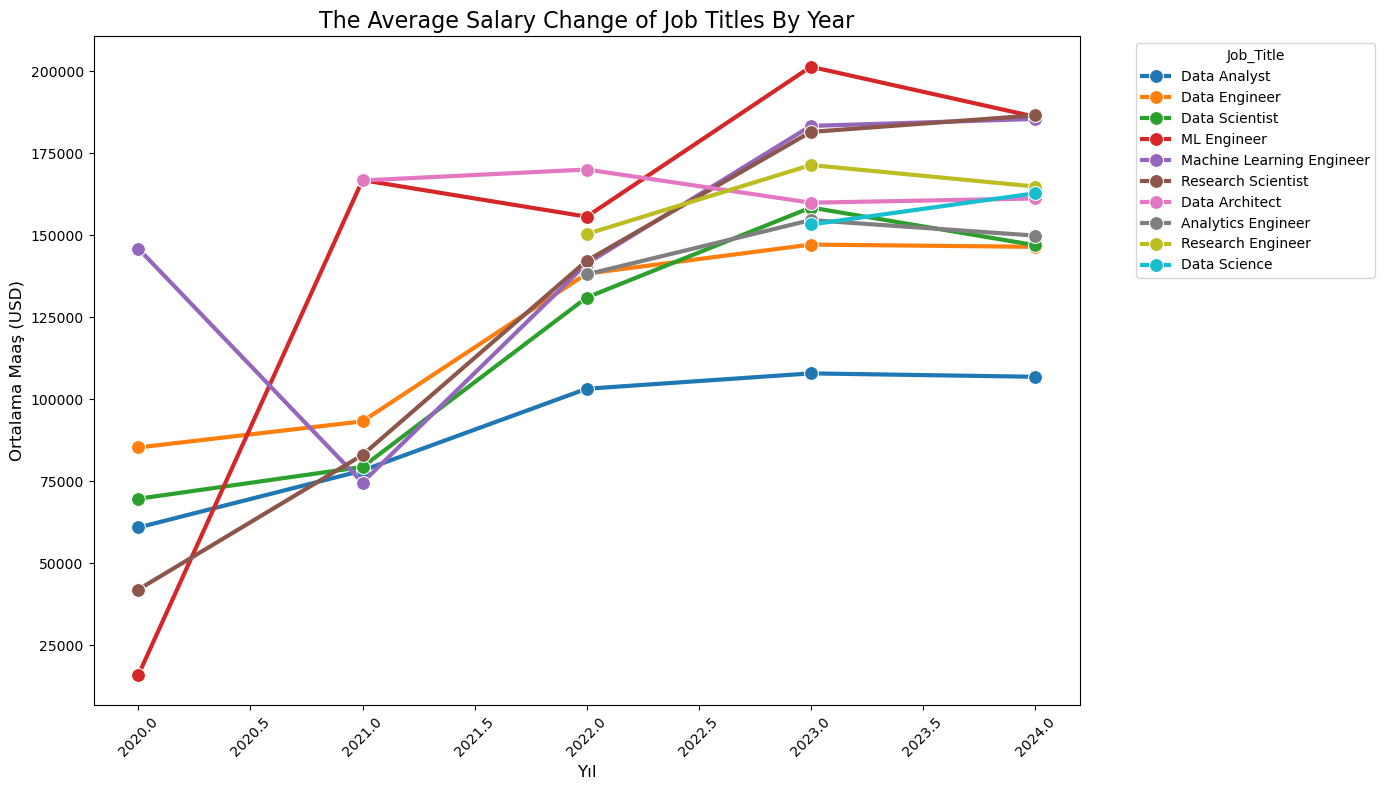

In [56]:
# 16.The Average Salary Change of Job Titles By Year
plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped_df, x='work_year', y='salary_in_usd', hue='job_title', marker='o', lw=3, ms=10)
plt.title('The Average Salary Change of Job Titles By Year', fontsize=16)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Ortalama Maaş (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Job_Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [57]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio'], dtype='object')

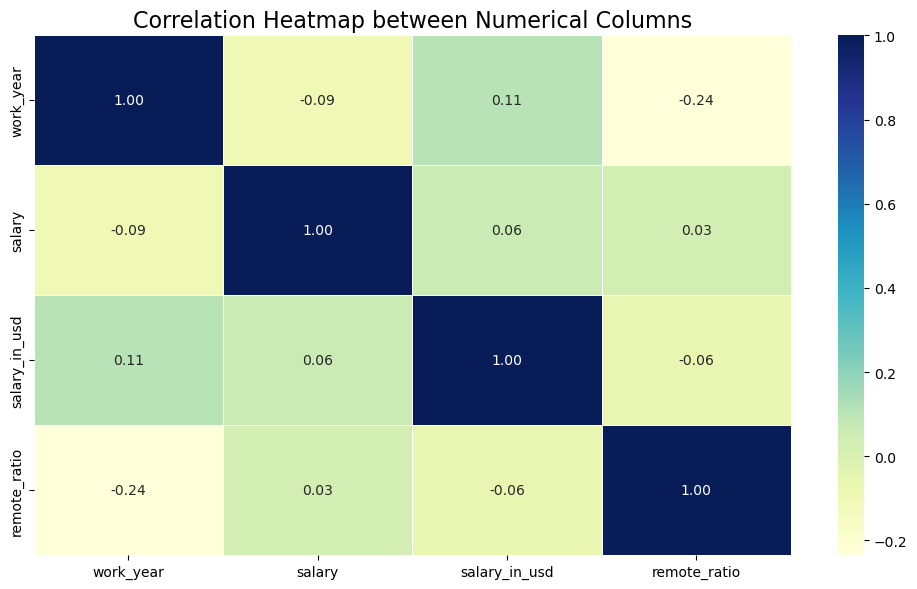

In [58]:
# Correlation matrix calculation
correlation_matrix = df[numeric_columns].corr()

# Drawing the heat map
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap between Numerical Columns', fontsize=16)
plt.tight_layout()
plt.show()